In [1]:
import h5py
import numpy as np
import matplotlib.pylab as plt

#### Reading the file


In [2]:
hf = h5py.File('SED_catalog_v6.hdf5', 'r')

#### All the available attribues

In [3]:
print(hf.keys())

<KeysViewHDF5 ['Metallicity', 'Mhalo', 'Mstar', 'SED', 'SED_wavelength', 'SFH', 'dec', 'luminosity', 'ra', 'redshift', 'sSFR']>


#### Read the catalog entries

In [4]:
ra = np.array(hf['ra'])
dec = np.array(hf['dec'])
redshift = np.array(hf['redshift'])
halo_mass = np.log10(np.array(hf['Mhalo']))
stellar_mass = np.log10(np.array(hf['Mstar']))
metal = np.log10(np.array(hf['Metallicity']))
sSFR = np.array(hf['sSFR'])

wavelength = np.array(hf['SED_wavelength'])
SEDs = np.array(hf['SED'])
luminosity = np.array(hf['luminosity'])

## Close the HDF5 
hf.close()

/tmp/ipykernel_928615/892805610.py:6: RuntimeWarning: invalid value encountered in log10
  metal = np.log10(np.array(hf['Metallicity']))


In [5]:
ra.shape, stellar_mass.shape, luminosity.shape, SEDs.shape

((395873,), (395873,), (395873,), (395873, 921))

#### Sample plots from the catalog entries

Text(0, 0.5, 'n(z)')

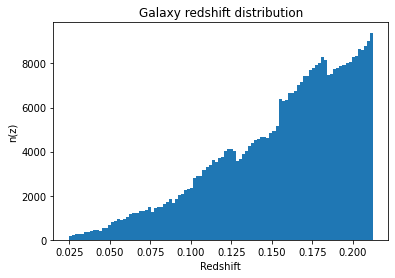

In [6]:
plt.hist( redshift, bins = 100);
plt.title('Galaxy redshift distribution')
plt.xlabel('Redshift')
plt.ylabel('n(z)')

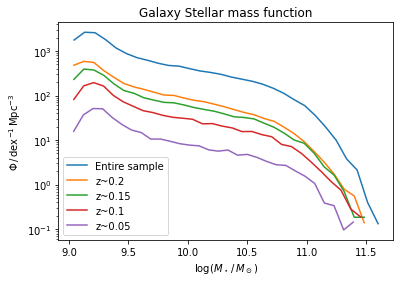

In [7]:
def GSMF(logsm):
    V     = 256                             #Survey volume in Mpc3
    Phi, bin_edges = np.histogram(logsm ,bins= 30) #Unnormalized histogram and bin edges
    dM    = bin_edges[1] - bin_edges[0]                 #Bin size
    Max   = bin_edges[0:-1] + dM/2.               #Mass axis
    Phi   = Phi / V / dM                    #Normalize to volume and bin size
    return Max, Phi


Max, Phi = GSMF(stellar_mass[stellar_mass > 9])
Max0_2, Phi0_2 = GSMF(stellar_mass[ (stellar_mass > 9)&(redshift < 0.21) &(redshift > 0.19)])
Max0_15, Phi0_15 = GSMF(stellar_mass[ (stellar_mass > 9)&(redshift < 0.16) &(redshift > 0.14)])
Max0_1, Phi0_1 = GSMF(stellar_mass[ (stellar_mass > 9)&(redshift < 0.11) &(redshift > 0.09)])
Max0_05, Phi0_05 = GSMF(stellar_mass[ (stellar_mass > 9)&(redshift < 0.06) &(redshift > 0.04)])


plt.figure()
plt.title('Galaxy Stellar mass function')
plt.yscale('log')
plt.xlabel(r'$\log(M_\star\,/\,M_\odot)$')
plt.ylabel(r'$\Phi\,/\,\mathrm{dex}^{-1}\,\mathrm{Mpc}^{-3}$')

plt.plot( Max, Phi , ls='-', label='Entire sample')
plt.plot( Max0_2, Phi0_2 , ls='-', label='z~0.2')
plt.plot( Max0_15, Phi0_15 , ls='-', label='z~0.15')
plt.plot( Max0_1, Phi0_1 , ls='-', label='z~0.1')
plt.plot( Max0_05, Phi0_05 , ls='-', label='z~0.05')

plt.legend()

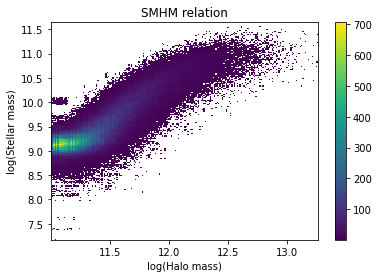

In [8]:
plt.figure()
# plt.plot(  halo_mass , stellar_mass, 'ro' , alpha=0.03, markersize=1)
plt.hist2d(  halo_mass , stellar_mass, bins=(200, 200), cmin = 1)

plt.title('SMHM relation')
plt.xlabel('log(Halo mass)')
plt.ylabel('log(Stellar mass)')
plt.colorbar()

Text(0, 0.5, 'log(sSFR)')

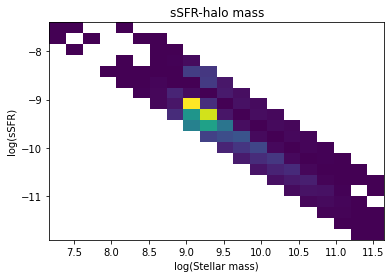

In [9]:
plt.figure()
plt.hist2d( stellar_mass, np.log10(sSFR), bins=(20, 20), cmin = 1)
# plt.plot( stellar_mass, sSFR, 'ro' , alpha=0.3, markersize=1)

plt.title('sSFR-halo mass')
plt.xlabel('log(Stellar mass)')
plt.ylabel('log(sSFR)')

Text(0.5, 1.0, 'Narrow band SEDs of a few galaxies')

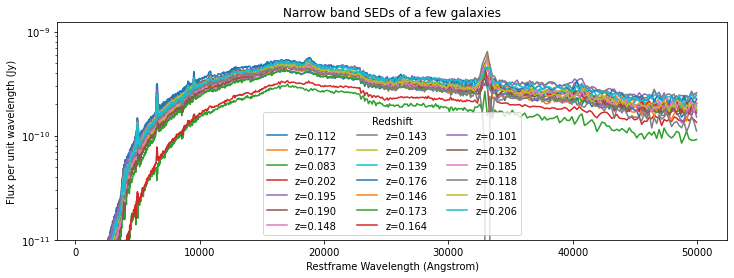

In [10]:
np.random.seed(10)
galID_arr = np.random.randint(low=0, high=SEDs.shape[0], size=20)

plt.figure(figsize=(12,4))

for idx, galID in enumerate(galID_arr):
    plt.plot(wavelength , SEDs[galID], label='z=%.3f'%redshift[galID]);


# plt.xscale('log')
plt.yscale('log')
# plt.xlim(1, )
plt.ylim(1e-11, )

plt.ylabel('Flux per unit wavelength (Jy)')
plt.xlabel(' Restframe Wavelength (Angstrom) ')
plt.legend(ncol=3, title='Redshift')
plt.title('Narrow band SEDs of a few galaxies')

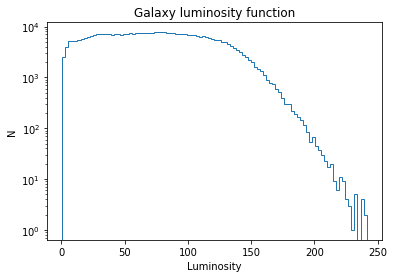

In [11]:
plt.hist( luminosity, bins = 100, histtype='step');
plt.title('Galaxy luminosity function')
plt.xlabel('Luminosity')
plt.ylabel('N')
plt.yscale('log')

Text(0, 0.5, 'n')

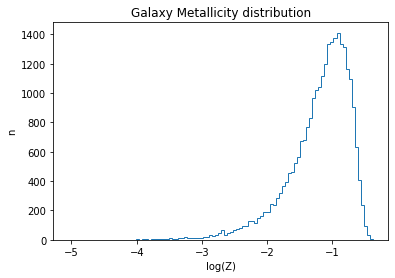

In [12]:
plt.hist( metal, bins = 100, histtype='step');
plt.title('Galaxy Metallicity distribution')
plt.xlabel('log(Z)')
plt.ylabel('n')

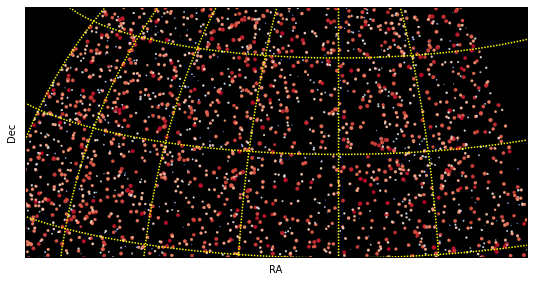

In [13]:
from mpl_toolkits.basemap import Basemap


plot_every_dot = 100
plt.figure(figsize=(9,9))

m = Basemap(projection = 'ortho', lon_0 = 60, lat_0 = 15,
            llcrnrx=-5000000, llcrnry=10000, urcrnrx=3000000, urcrnry=4000000, 
            resolution = 'l')

x_projected, y_projected = m(ra[::plot_every_dot], dec[::plot_every_dot])


plt.scatter(x_projected, y_projected, c=redshift[::plot_every_dot], s = luminosity[::plot_every_dot]/10, alpha=1, marker='o', lw = 0.3, cmap=plt.get_cmap('coolwarm'));

plt.xlabel('RA')
plt.ylabel('Dec')

plt.grid(color='w', linestyle='--', linewidth=1)

m.drawparallels(np.arange(0.,90.,15.), color='yellow', textcolor='yellow', linewidth=1.5)
m.drawmeridians(np.arange(0.,90.,15.), color='yellow', textcolor='yellow', linewidth=1.5)
m.drawmapboundary(fill_color='black')

In [14]:
## Comparison with Richard's spectra

In [15]:
import pandas as pd
fileCSV = '../Richard_GAMA_SED_103122_median_stack_z_Mstar_bins.csv'

In [16]:
df = pd.read_csv(fileCSV)
print(df.keys())

wave_csv = df['lambda_micron']
fnu = df['f_nu_mJy_z0.2_m11.0']


Index(['lambda_micron', 'f_nu_mJy_z0.05_m10.0', 'f_nu_mJy_z0.05_m10.5',
       'f_nu_mJy_z0.05_m11.0', 'f_nu_mJy_z0.1_m10.0', 'f_nu_mJy_z0.1_m10.5',
       'f_nu_mJy_z0.1_m11.0', 'f_nu_mJy_z0.15_m10.0', 'f_nu_mJy_z0.15_m10.5',
       'f_nu_mJy_z0.15_m11.0', 'f_nu_mJy_z0.2_m10.0', 'f_nu_mJy_z0.2_m10.5',
       'f_nu_mJy_z0.2_m11.0'],
      dtype='object')


Text(0.5, 1.0, 'Narrow band SEDs of a few galaxies')

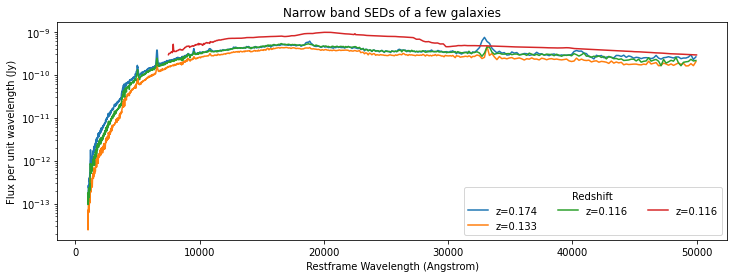

In [17]:
np.random.seed(1)
galID_arr = np.random.randint(low=0, high=SEDs.shape[0], size=3)

plt.figure(figsize=(12,4))

for idx, galID in enumerate(galID_arr):
    plt.plot(wavelength , SEDs[galID], label='z=%.3f'%redshift[galID]);

plt.plot(wave_csv*10_000 , 1e-9*fnu, label='z=%.3f'%redshift[galID]);


# plt.xscale('log')
plt.yscale('log')
# plt.xlim(1, )
# plt.ylim(1e-11, )

plt.ylabel('Flux per unit wavelength (Jy)')
plt.xlabel(' Restframe Wavelength (Angstrom) ')
plt.legend(ncol=3, title='Redshift')
plt.title('Narrow band SEDs of a few galaxies')